In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping

%matplotlib inline

In [2]:
def showPalImge(allImage, row=1, col=2, fg=(8,8)):
    cols = col
    rows = row
    fig = plt.figure(figsize=fg)
    for i in range(1, cols * rows + 1):
        img = allImage[i-1]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()

(700, 1050, 3)


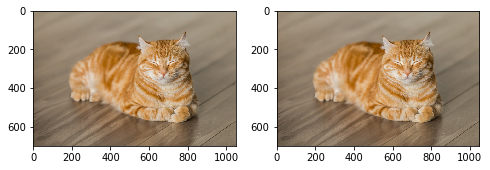

In [3]:
img = mping.imread('../tmp/cat.jpeg')
print(img.shape)

showPalImge([img,img], row=1, col=2)

# Flip

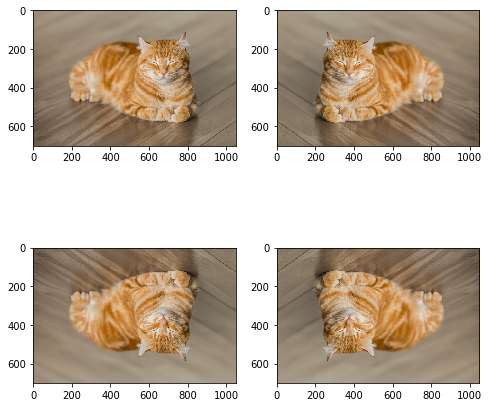

In [4]:
hor_flip = cv2.flip(img, 1)
ver_flip = cv2.flip(img, 0)
hv_flip = cv2.flip(img, -1)

showPalImge([img, hor_flip, ver_flip, hv_flip], row=2, col=2)

# Brightness

In [5]:
def AdjBrightness(image, bright=0):
    # RGB -> HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = hsv.astype(np.uint16)
    hsv[:,:,2] += bright
    hsv[:,:,2] = np.minimum(hsv[:,:,2], 255)
    hsv[:,:,2] = np.maximum(hsv[:,:,2], 0)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

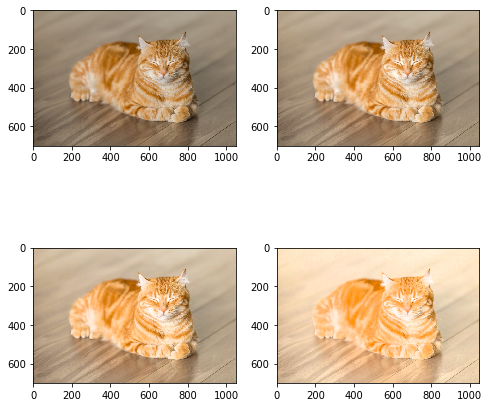

In [6]:
brg1 = AdjBrightness(img, bright=25)
brg2 = AdjBrightness(img, bright=50)
brg3 = AdjBrightness(img, bright=100)
showPalImge([img, brg1, brg2, brg3], row=2, col=2)

# Contrast

In [7]:
def contrast(image, value=3.0):
    # LAB channel 
    lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Splitting the LAB image to different channels
    l, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=value, tileGridSize=(8,8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L-channel with the a and b channel
    clab = cv2.merge((cl,a,b))
    
    return cv2.cvtColor(clab, cv2.COLOR_LAB2BGR)

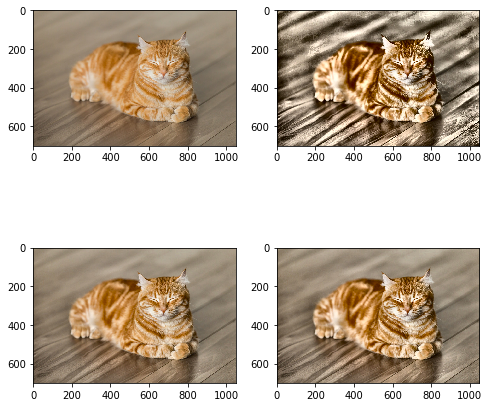

In [8]:
cst1 = contrast(img, value=0.0)
cst2 = contrast(img, value=1.0)
cst3 = contrast(img, value=2.0)

showPalImge([img, cst1, cst2, cst3], row=2, col=2)

# Tone

In [9]:
def tone(image, color_value=0):
    # RGB -> HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = hsv.astype(np.uint16)
    hsv[:,:,0] += color_value
    hsv[:,:,0] = np.minimum(hsv[:,:,0], 255)
    hsv[:,:,0] = np.maximum(hsv[:,:,0], 0)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

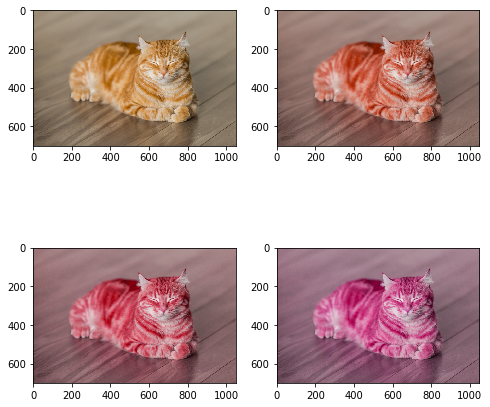

In [10]:
tone1 = tone(img, 10)
tone2 = tone(img, 20)
tone3 = tone(img, 30)

showPalImge([img, tone1, tone2, tone3], row=2, col=2)

# Crop

In [11]:
def crop(image, scale=0.5):
    (h, w) = image.shape[:2]
    new_h = int(h * 0.5)
    new_w = int(w * 0.5)
    rand_x = np.random.randint(w * (1-scale))
    rand_y = np.random.randint(h * (1-scale))
    #print(h, w, new_h, new_w, rand_x, rand_y)
    return image[rand_y : (rand_y + new_h), rand_x : (rand_x + new_w)]

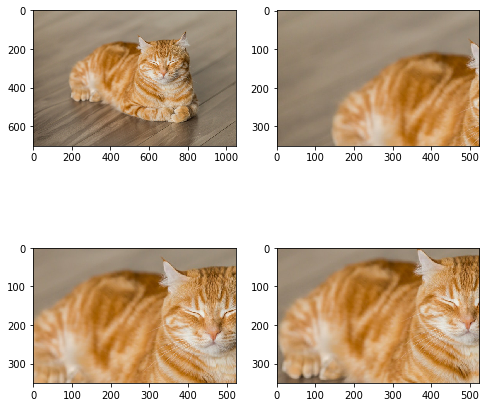

In [12]:
crop1 = crop(img, 0.5)
crop2 = crop(img, 0.5)
crop3 = crop(img, 0.8)

showPalImge([img, crop1, crop2, crop3], row=2, col=2)

# Translate (shift)

In [13]:
def shift(image, x, y):
    m = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(image, m, (image.shape[1], image.shape[0]))

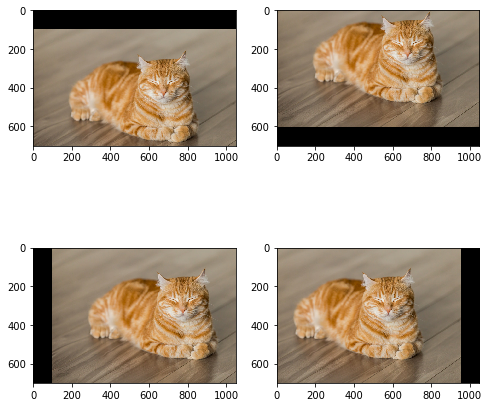

In [14]:
down = shift(img, 0, 100)
up = shift(img, 0, -100)
right = shift(img, 100, 0)
left = shift(img, -100, 0)
showPalImge([down,up,right,left], 2, 2)

# Rotation

In [15]:
def rotate(image, angle=0, center=None, scale=1.0):
    (h, w) = image.shape[:2]   # get width and height
    
    if center is None:
        # get the image center as the default center
        center = (w / 2, h / 2)
    
    # get rotation mapping matrix
    m = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, m, (w, h))

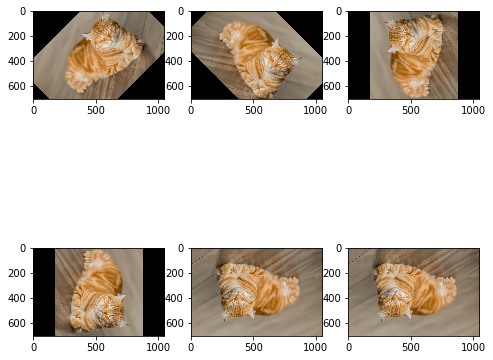

In [16]:
rot1 = rotate(img, 45)
rot2 = rotate(img, -45)
rot3 = rotate(img, 90)
rot4 = rotate(img, -90)
rot5 = rotate(img, 180)
rot6 = rotate(img, -180)

showPalImge([rot1, rot2, rot3, rot4, rot5, rot6], row=2, col=3)

# Scale

In [17]:
def resize(image, width=None, height=None, method=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    
    if width is None and height is None:
        return image
    
    # calculate the ratio
    if width is None:
        ratio = float(height) / float(h)
        dim = (int(ratio * w), int(height))
    else:
        ratio = float(width) / float(w)
        dim = (int(width), int(h * ratio))
    
    # resize the image
    resized = cv2.resize(image, dim, interpolation=method)
    
    return resized

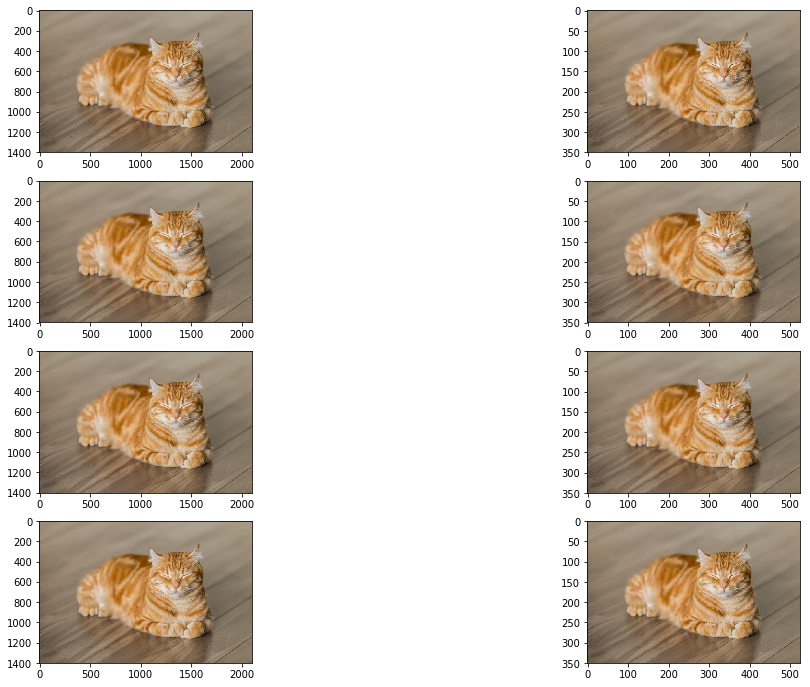

In [18]:
methods = [("cv2.INTER_NEAREST", cv2.INTER_NEAREST),\
           ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),\
           ("cv2.INTER_AREA", cv2.INTER_AREA),\
           ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),\
           ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

imgList = []
for name, mtd in methods:
    # reisze to 2
    resized_img = resize(img, width=img.shape[1]*2, method=mtd)
    imgList.append(resized_img)
    
    # resize to 1/2
    resized_img = resize(img, width=img.shape[1]*(0.5), method=mtd)
    imgList.append(resized_img)
    
showPalImge(imgList, row=4, col=len(imgList)//4, fg=(18,12))